In [165]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [166]:
# from google.colab import drive
# drive.mount('/content/drive')

- 데이터 경로 변수

In [167]:
# DATA_PATH = "/content/drive/MyDrive/파이널프로젝트/data/"
# DATA_PATH

In [168]:
DATA_PATH = "data/"
DATA_PATH

'data/'

- 시드값

In [169]:
SEED = 42

- 데이터 불러오기

In [170]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [171]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 2305), (12225, 2305))

- 정답 데이터

In [172]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [173]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

Series([], dtype: int64)

In [174]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

Series([], dtype: int64)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [175]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 2304), (12225, 2304))

- 추가 피처 만들어 보기

In [176]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_지점코드_") ]

train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2307), (12225, 2307))

In [177]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_중분류_") ]

train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2310), (12225, 2310))

In [178]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_대분류_") ]

train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2313), (12225, 2313))

In [179]:
cols = [ col for col in train_ft.columns if col.startswith("pivot_브랜드코드_") ]

train_ft["브랜드코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["브랜드코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["브랜드코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["브랜드코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["브랜드코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["브랜드코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2316), (12225, 2316))

In [180]:
cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2319), (12225, 2319))

In [181]:
cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2322), (12225, 2322))

In [182]:
cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2325), (12225, 2325))

In [183]:
cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 2328), (12225, 2328))

In [184]:
cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

train_ft.shape, test_ft.shape

((14940, 2329), (12225, 2329))

## Feature Encoding

In [185]:
train_ft["첫구매날짜"] = pd.to_datetime(train_ft["첫구매날짜"])
train_ft["마지막구매날짜"] = pd.to_datetime(train_ft["마지막구매날짜"])
test_ft["첫구매날짜"] = pd.to_datetime(test_ft["첫구매날짜"])
test_ft["마지막구매날짜"] = pd.to_datetime(test_ft["마지막구매날짜"])

train_ft["첫구매년도"] = train_ft["첫구매날짜"].dt.year
train_ft["첫구매월"] = train_ft["첫구매날짜"].dt.month
train_ft["마지막구매년도"] = train_ft["마지막구매날짜"].dt.year
train_ft["마지막구매월"] = train_ft["마지막구매날짜"].dt.month

test_ft["첫구매년도"] = test_ft["첫구매날짜"].dt.year
test_ft["첫구매월"] = test_ft["첫구매날짜"].dt.month
test_ft["마지막구매년도"] = test_ft["마지막구매날짜"].dt.year
test_ft["마지막구매월"] = test_ft["마지막구매날짜"].dt.month

train_ft.shape, test_ft.shape

((14940, 2333), (12225, 2333))

- 범주형 피처
    - 주구매지점, 주구매_중분류, 주구매_대분류, 주구매시간대, 선호브랜드코드, 고객등급

In [186]:
# %pip install category_encoders

In [187]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["주구매지점","주구매_대분류", "주구매시간대"]
oh_enc_data = pd.concat([train_ft[oh_enc_cols], test_ft[oh_enc_cols]])
oh_enc.fit(oh_enc_data)

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 2374), (12225, 2374))

In [188]:
ord_enc = OrdinalEncoder(categories=[['Normal', 'Black', 'Gold', 'Platinum', 'Diamond']])
train_ft["고객등급"] = ord_enc.fit_transform(train_ft[["고객등급"]])
test_ft["고객등급"] = ord_enc.transform(test_ft[["고객등급"]])

train_ft.shape, test_ft.shape

((14940, 2374), (12225, 2374))

In [189]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.shape, test_ft.shape

((14940, 2375), (12225, 2375))

In [190]:
combined_categories = pd.concat([train_ft['주구매_중분류'], test_ft['주구매_중분류']])

enc = ce.count.CountEncoder()
train_ft["주구매_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_중분류"]])
test_ft["주구매_중분류_cnt"] = enc.transform(test_ft[["주구매_중분류"]])

train_ft.shape, test_ft.shape

((14940, 2376), (12225, 2376))

- 문자열 피처 삭제

In [191]:
cols = train_ft.select_dtypes(["object", "datetime"]).columns.tolist()
cols

['첫구매날짜', '마지막구매날짜', '주구매지점', '주구매_중분류', '주구매_대분류']

In [192]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 2371), (12225, 2371))

In [193]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [194]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [195]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [196]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum()

(0, 0)

In [197]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer
scaler = Normalizer()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,총방문일수,백화점이용기간,구매주기,주말방문일수,일별평균구매건수,구매간격_표준편차,평균구매요일,주구매요일,월요일_구매비율,화요일_구매비율,...,주구매시간대_13,주구매시간대_14,주구매시간대_15,주구매시간대_16,주구매시간대_17,주구매시간대_18,주구매시간대_19,주구매시간대_20,선호브랜드코드_cnt,주구매_중분류_cnt
0,0.000002,0.000044,4.882933e-06,3.487809e-07,2.712741e-07,3.966474e-06,5.231714e-07,3.487809e-07,1.245646e-08,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,1.743905e-07,4.115615e-05
1,0.000004,0.000062,2.808654e-06,1.755409e-07,3.510817e-07,2.060698e-06,4.054158e-07,5.266226e-07,8.359088e-09,4.597499e-08,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,1.755409e-07,0.0,0.0,1.237739e-03,9.145679e-05
2,0.000002,0.000014,2.406774e-07,4.412419e-07,7.439119e-08,2.013662e-07,9.359676e-08,0.000000e+00,1.022486e-08,7.472010e-09,...,0.0,0.0,4.011290e-08,0.000000e+00,0.0,0.000000e+00,0.0,0.0,3.209032e-07,5.615805e-07
3,0.000002,0.000008,7.147265e-08,4.526601e-07,4.897200e-08,7.474003e-08,7.340434e-08,9.529686e-08,1.802914e-09,2.704370e-09,...,0.0,0.0,2.382422e-08,0.000000e+00,0.0,0.000000e+00,0.0,0.0,5.122206e-06,1.112353e-04
4,0.000003,0.000037,1.527952e-06,7.052085e-07,1.763021e-07,1.406037e-06,4.538147e-07,4.701390e-07,9.794563e-09,6.529708e-09,...,0.0,0.0,0.000000e+00,1.175348e-07,0.0,0.000000e+00,0.0,0.0,8.287375e-04,2.408287e-04


# 차원축소

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

model = LGBMClassifier(random_state=SEED)
model.fit(train_ft, target)

scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168140
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1684
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


0.7162760112264671

- XAI 활용

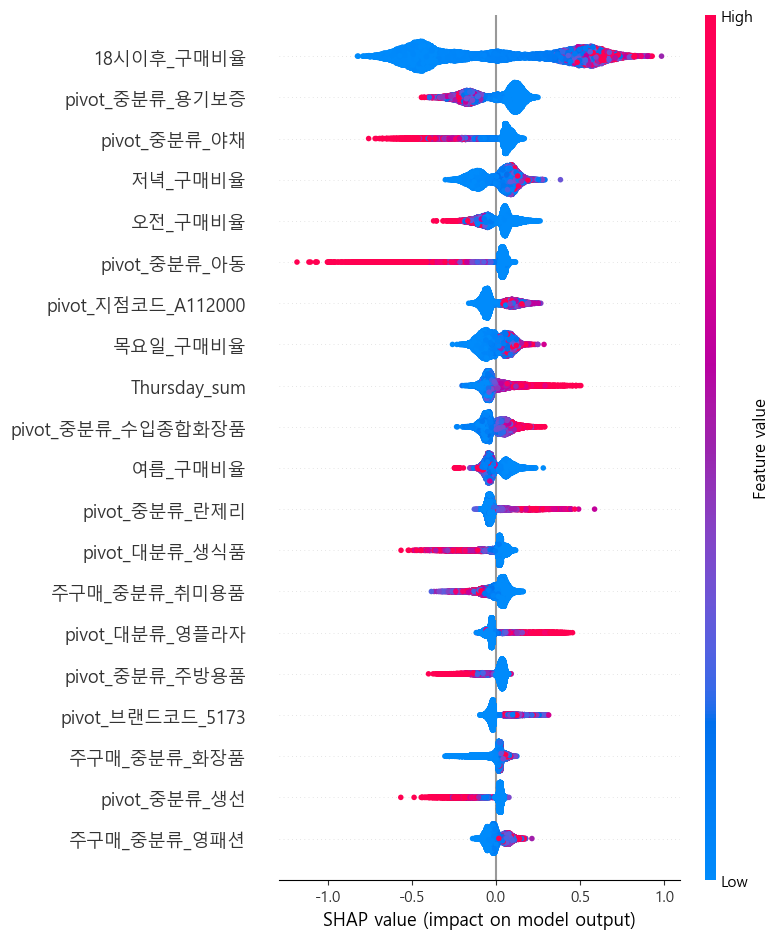

In [202]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(train_ft)
shap.summary_plot(shap_values, train_ft)

- SelectFromModel

In [211]:
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(random_state=SEED)

# thresholds = [
#     'mean', 'median',
#     '0.5*mean', '0.8*mean', '1.2*mean', '1.5*mean', '1.8*mean', '2*mean',
#     '0.5*median', '0.8*median', '1.2*median', '1.5*median', '1.8*median', '2*median'
# ]

# thresholds = [f"{i}*mean" for i in np.arange(0.1, 1.1, 0.1)] # 0.5*mean 일 때 성능이 가장 높음
# thresholds = [f"{i}*median" for i in np.arange(1.5, 3.6, 0.1)] # 2.5*median
# thresholds = [f"{i}*median" for i in np.arange(3.5, 4.0, 0.1)] # 3.5*median
thresholds = ['2.5*median', '3.5*median', '0.5*mean']

for threshold in thresholds:
    sfm = SelectFromModel(rf, threshold=threshold)
    train_sfm = sfm.fit_transform(train_ft, target)

    scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"threshold={threshold}, 성능={np.mean(scores)}, 특성 수={train_sfm.shape[1]}")

threshold=2.5*median, 성능=0.7177587462783523, 특성 수=757
threshold=3.5*median, 성능=0.7189605934955099, 특성 수=619
threshold=0.5*mean, 성능=0.7184513549106644, 특성 수=691


In [212]:
sfm = SelectFromModel(rf, threshold='3.5*median')
train_sfm = sfm.fit_transform(train_ft, target)

scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sfm.shape

(0.7189605934955099, (14940, 619))

- SelectKBest

In [162]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold

vt = VarianceThreshold(threshold=0)
train_vt = vt.fit_transform(train_ft)
test_vt = vt.transform(test_ft)

In [166]:
for k in range(450, 1001, 50):
    skb = SelectKBest(k=k)
    train_skb = skb.fit_transform(train_vt, target)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=450, 정확도=0.719368499209644
특성수=500, 정확도=0.7195779838956156
특성수=550, 정확도=0.7199861338503422
특성수=600, 정확도=0.7181389775840055
특성수=650, 정확도=0.7197710633704231
특성수=700, 정확도=0.7214393560290582
특성수=750, 정확도=0.7208649568795129
특성수=800, 정확도=0.7199818639172902
특성수=850, 정확도=0.7192051542991476
특성수=900, 정확도=0.7196016722426354
특성수=950, 정확도=0.7175789371569644
특성수=1000, 정확도=0.7174593190118972


In [168]:
for k in range(725, 736):
    skb = SelectKBest(k=k)
    train_skb = skb.fit_transform(train_vt, target)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=725, 정확도=0.7216526728496501
특성수=726, 정확도=0.7226223655612163
특성수=727, 정확도=0.7222296098955899
특성수=728, 정확도=0.7222296098955899
특성수=729, 정확도=0.7215964443888796
특성수=730, 정확도=0.7220882177912878
특성수=731, 정확도=0.721800763116265
특성수=732, 정확도=0.7221709951460635
특성수=733, 정확도=0.7221304285324186
특성수=734, 정확도=0.7213272868614163
특성수=735, 정확도=0.7218517055924929


In [351]:
skb = SelectKBest(k=726)
train_skb = skb.fit_transform(train_vt, target)

scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_skb.shape

(0.7226223655612163, (14940, 726))

- SelectPercentile

In [199]:
from sklearn.feature_selection import SelectPercentile

# percentiles = [i for i in range(1, 100, 5)] # 16 ~ 26 / 26 ~ 41 / 56 ~ 66 / 86 이상에서 성능점수 높게나옴
percentiles = [i for i in range(56, 67)] # 24일 때 성능점수 가장 높음

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    train_sp = sp.fit_transform(train_vt, target)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=56, 성능=0.7199288611361622, 특성 수=1330
percentile=57, 성능=0.7189857625796632, 특성 수=1354
percentile=58, 성능=0.7216170608158514, 특성 수=1377
percentile=59, 성능=0.7201152524367597, 특성 수=1401
percentile=60, 성능=0.7198328823063976, 특성 수=1425
percentile=61, 성능=0.7221499801163975, 특성 수=1449
percentile=62, 성능=0.718888382910864, 특성 수=1472
percentile=63, 성능=0.7183910527751847, 특성 수=1496
percentile=64, 성능=0.7177962916306152, 특성 수=1520
percentile=65, 성능=0.7196660051420846, 특성 수=1544
percentile=66, 성능=0.717581167483486, 특성 수=1567


In [352]:
sp = SelectPercentile(percentile=24)
train_sp = sp.fit_transform(train_vt, target)

scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sp.shape

(0.7227419655358533, (14940, 570))

- SelectPercentile 에서 구한 값 근처의 피처 개수에 대해 SelectKBest

In [203]:
for k in range(550, 561):
    skb = SelectKBest(k=k)
    train_skb = skb.fit_transform(train_sp, target)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}") # 특성수 569 일 때 최고성능점수

특성수=550, 정확도=0.7199861338503422
특성수=551, 정확도=0.7184443539334369
특성수=552, 정확도=0.7186315159630591
특성수=553, 정확도=0.7224512827286883
특성수=554, 정확도=0.7193913443410557
특성수=555, 정확도=0.7219382983605932
특성수=556, 정확도=0.7212435657224019
특성수=557, 정확도=0.7202676603434577
특성수=558, 정확도=0.7217585207368021
특성수=559, 정확도=0.7218867348250179
특성수=560, 정확도=0.7227082207619155


In [361]:
skb = SelectKBest(k=569)
train_skb = skb.fit_transform(train_vt, target)

scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_skb.shape

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [69] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(0.7227419655358533, (14940, 569))

- PCA

In [313]:
from sklearn.decomposition import PCA

pca = PCA(train_ft.shape[1], random_state=SEED)
pca_train = pca.fit_transform(train_ft)

scores = cross_val_score(model, pca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca_train.shape

(0.6969979525460819, (14940, 2376))

In [308]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum >= 0.7) + 1
n_components

862

In [309]:
pca = PCA(n_components, random_state=SEED)
x_train = pca.fit_transform(train_ft)

scores = cross_val_score(model, x_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), x_train.shape

(0.6972223512134963, (14940, 862))

- LDA

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_ft, target, test_size=0.2, random_state=SEED
)

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)

scores = cross_val_score(model, X_train_lda, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), X_train_lda.shape

(0.7782207613543717, (11952, 1))

In [146]:
scores = cross_val_score(model, X_val_lda, y_val, cv=cv, scoring='f1_macro', n_jobs=-1)
np.mean(scores)

0.6636680503203349

- RFE

In [140]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=500, step=50)
x_train_rfe = rfe.fit_transform(train_ft, target)

scores = cross_val_score(model, x_train_rfe, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), x_train_rfe.shape

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169415
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1689
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168811
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1661
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGB

(0.7211363407247131, (14940, 500))

- 최종적으로 모델에 넣을 학습데이터

In [119]:
skb = SelectKBest(k=569) # or 726
train_ft = skb.fit_transform(train_vt, target)
test_ft = skb.transform(test_vt)
train_ft.shape, test_ft.shape

((14940, 569), (12225, 569))

# 모델 선택

In [402]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
model.fit(train_ft, target)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95122
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

# cv 점수 확인해보기

In [559]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [403]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7227419655358533

# 모델 학습

In [120]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95122
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 569
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

# 테스트 데이터 예측

In [121]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [563]:
# pred = model.predict_proba(test_ft)[:,1]
# pred

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [122]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [359]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)